In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
   
###Densidades de energía al día de hoy reportado en la literatura###

def rk4(d,N_0,n_0,h):
    
    N=[]
    n=[]
    
    k1 = []
    k2 = []
    k3 = []
    k4 = []
    n.append(n_0)
    N.append(N_0)
   
    Om_0_m=0.0455
    Om_0_DM=0.226
    Om_0_n=0.000027
    Om_0_z=0.00004
    Om_0_L=0.728
    s_0=0.1
    w_0=0.1
    lam=0
    k_0=1
    m=0.1
    H_0=70.4

    def f(N_0, n_0, Om_0_m, Om_0_DM, Om_0_n, Om_0_z, Om_0_L, s_0, w_0, lam, k_0, m): 
        H = H_0*(Om_0_m*np.exp(-3*N_0)+ Om_0_DM*np.exp(-3*N_0)+Om_0_n*np.exp(-4*N_0)+Om_0_z*np.exp(-4*N_0)+Om_0_L)
        
        return -(((12./(k_0*k_0))*(Om_0_DM)*(n_0/H)*np.exp(-3*N_0))
              +4*(m**2+lam*n_0**2)*(n_0/H)**2
              -4*((s_0/H)**2)*np.exp(-4*N_0))**0.5
    
    for i in range(d):
        k1.append( f(N[i], n[i],    Om_0_m, Om_0_DM, Om_0_n, Om_0_z, Om_0_L, s_0, w_0, lam, k_0, m) )
    
        k2.append( f(N[i]+h/2., n[i]+k1[i]*h/2.,    Om_0_m, Om_0_DM, Om_0_n, Om_0_z, Om_0_L, s_0, w_0, lam, k_0, m) )
    
        k3.append( f(N[i]+h/2.,n[i]+k2[i]*h/2.,    Om_0_m, Om_0_DM, Om_0_n, Om_0_z, Om_0_L, s_0, w_0, lam, k_0, m) )
   
        k4.append( f(N[i]+h,n[i]+k3[i]*h,    Om_0_m, Om_0_DM, Om_0_n, Om_0_z, Om_0_L, s_0, w_0, lam, k_0, m) )
    
        n.append(n[i] + (h/6.)*(k1[i] + 2.*k2[i] + 2.*k3[i] + k4[i]))
        N.append(N[i]+h)
        
  #      print (k1,k2,k3,k4)
    graph=np.vstack([N,n])
    return graph




                            

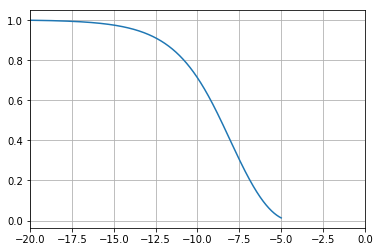

In [11]:
d=15000
h=0.001
N_0=-20
n_0=1

r=rk4(d,N_0,n_0,h)
    
  
           
plt.plot(r[0],r[1])
#plt.title("Densidad de número")
#plt.xlabel("$N$")
#plt.ylabel("$n_0(N)$")
plt.xlim(-20,0)
#plt.ylim(0.1,1)
#plt.legend(loc="upper right")
plt.grid()
plt.show()


In [19]:
def pot(N_0,k_0,n_0):
    return np.exp(-(N_0+(k_0**2)*n_0))


In [29]:
pot_luis = []

for ii in range(len(r[0])):
    pot_luis.append(pot(r[0,ii],1,r[1,ii]))

In [30]:
print pot_luis

[178482300.96318725, 178304102.02660352, 178126081.1029397, 177948238.01431936, 177770572.58304584, 177593084.63159803, 177415773.98263347, 177238640.458987, 177061683.88366976, 176884904.07987043, 176708300.87095433, 176531874.08046332, 176355623.53211427, 176179549.0498021, 176003650.4575971, 175827927.57974532, 175652380.24066785, 175477008.26496238, 175301811.47740072, 175126789.70293036, 174951942.76667428, 174777270.49392968, 174602772.7101676, 174428449.24103478, 174254299.91235155, 174080324.55011287, 173906522.98048642, 173732895.02981532, 173559440.5246138, 173386159.2915725, 173213051.15755224, 173040115.94958982, 172867353.49489182, 172694763.62083995, 172522346.1549878, 172350100.92506066, 172178027.7589559, 172006126.4847442, 171834396.93066606, 171662838.92513618, 171491452.2967382, 171320236.8742289, 171149192.48653552, 170978318.96275565, 170807616.1321583, 170637083.82418367, 170466721.86844173, 170296530.0947121, 170126508.33294582, 169956656.41326308, 169786974.1659

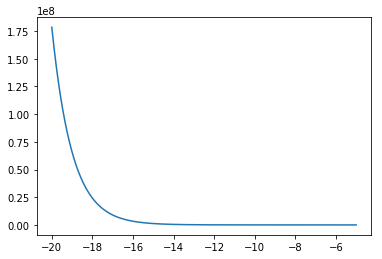

In [32]:
plt.plot(r[0],pot_luis)

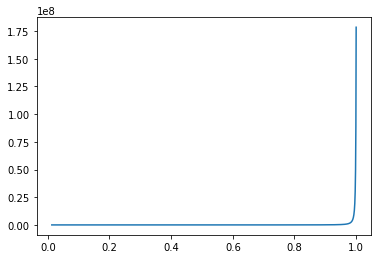

In [33]:
plt.plot(r[1],pot_luis)